In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## 1. Chargement des données et Normalisation

In [2]:
# Chargement des données MNIST
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

print('trainset:', X_train.shape) # 60,000 images
print('testset:', X_test.shape) # 10,000 images

# Normalisation des données
X_train = X_train / 255
X_test = X_test / 255

trainset: (60000, 28, 28)
testset: (10000, 28, 28)


## 2. Visualisation des données

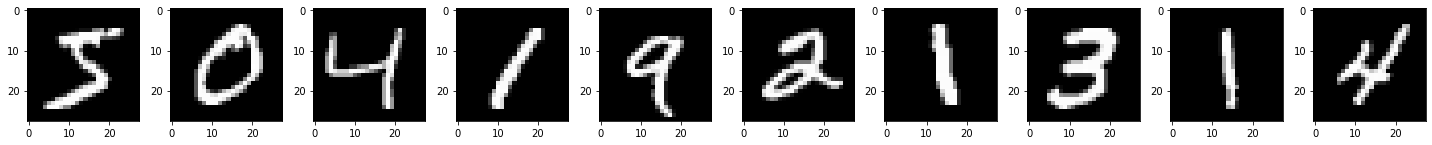

In [3]:
# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()

## 3. Configuration des Couches du Réseau de Neurones

In [4]:
# Configuration des couches du réseau
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## 4. Entrainement du Réseau de Neurones

In [5]:
import numpy as np
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [6]:
def loss_function(m):
    return m**2-2*m+1
## take derivative
def grad_function(m):
    return 2*m-2
def check_convergence(w0, w1):
    return (w0 == w1)

In [8]:
w_0 = 0
b_0 = 0
adam = AdamOptim()
t = 1 
converged = False

while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    w_0_old = w_0
    w_0, b_0 = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0))
        t+=1

iteration 1: weight=0.009999999950000001
iteration 2: weight=0.01999725400385255
iteration 3: weight=0.029989900621600046
iteration 4: weight=0.039976060276935343
iteration 5: weight=0.049953839711732076
iteration 6: weight=0.05992133621693422
iteration 7: weight=0.06987664190678831
iteration 8: weight=0.07981784795404925
iteration 9: weight=0.08974304875491491
iteration 10: weight=0.0996503459940126
iteration 11: weight=0.10953785258172263
iteration 12: weight=0.11940369643843479
iteration 13: weight=0.12924602410293135
iteration 14: weight=0.13906300414491304
iteration 15: weight=0.14885283036466956
iteration 16: weight=0.15861372476597732
iteration 17: weight=0.1683439402914239
iteration 18: weight=0.17804176331244895
iteration 19: weight=0.1877055158694015
iteration 20: weight=0.19733355765979776
iteration 21: weight=0.2069242877756729
iteration 22: weight=0.21647614619342795
iteration 23: weight=0.22598761502184558
iteration 24: weight=0.23545721951596985
iteration 25: weight=0.24

C:\Users\PCr\AppData\Local\Temp\ipykernel_6608\1097381739.py:32: RuntimeWarning: invalid value encountered in sqrt
  b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))


In [9]:
# Compilation du modele
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement du modele
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2256 - accuracy: 0.9336
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0948 - accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

## 5. Évaluation du réseau de neurone sur les données de Test

In [10]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1061 - accuracy: 0.9754
Test accuracy: 0.9753999710083008


## 6. Création d'un modele prédictif

In [11]:
# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)

print(predictions[:10])
print(y_test[:10])

313/313 [==============================] - 1s 2ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]
